In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
cat

,fit_time,score_time,test_score
0,5.937427,0.009931,0.926950
1,6.234431,0.009890,0.898789
2,6.223805,0.010936,0.936517
3,6.069357,0.010081,0.929022
4,6.216226,0.013204,0.950638
5,6.588912,0.006553,0.936688
6,6.266094,0.014054,0.942846
7,5.972977,0.012768,0.926769
8,5.271462,0.004957,0.945508
9,5.172607,0.006005,0.884738


In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [11]:
ordinald1 = pd.read_csv('OrdinalDropIF309.csv')
ordinald1.shape

(2579, 83)

In [12]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [13]:
Xd1 = ordinald1.drop(['SalePrice'], axis=1)
yd1 = ordinald1.SalePrice

In [14]:
catd1 = evaluate_model(cb, Xd1, yd1)

In [15]:
catd1

,fit_time,score_time,test_score
0,8.115700,0.024451,0.931308
1,5.676068,0.007323,0.946897
2,7.809292,0.022868,0.946280
3,7.127496,0.008150,0.911824
4,6.311365,0.005824,0.949900
5,7.688922,0.021059,0.933133
6,7.524903,0.021799,0.929582
7,7.534667,0.020984,0.926053
8,4.582112,0.006575,0.950737
9,4.421411,0.005458,0.939564


In [16]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [17]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [18]:
ordinalIF1 = pd.read_csv('OrdinalDropIF50.csv')
ordinalIF1.shape

(2579, 83)

In [19]:
ordinalIF1 = ordinalIF1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF1.shape

(2579, 80)

In [20]:
XIF1 = ordinalIF1.drop(['SalePrice'], axis=1)
yIF1 = ordinalIF1.SalePrice

In [21]:
catIF50 = evaluate_model(cb, XIF1, yIF1)

In [22]:
catIF50

,fit_time,score_time,test_score
0,6.257904,0.011153,0.935051
1,6.218869,0.008069,0.940925
2,6.073900,0.005919,0.904279
3,6.094287,0.007517,0.914509
4,5.976556,0.010435,0.948420
5,6.028338,0.007658,0.929249
6,7.428348,0.023448,0.936556
7,5.881655,0.009082,0.927905
8,5.481779,0.011233,0.897123
9,5.532747,0.004870,0.949209


In [23]:
catIF50 = catIF50[['test_score']].rename(columns={'test_score':'catIF1_score'})

In [24]:
catIF50

,catIF1_score
0,0.935051
1,0.940925
2,0.904279
3,0.914509
4,0.948420
5,0.929249
6,0.936556
7,0.927905
8,0.897123
9,0.949209


In [25]:
combo = pd.concat([cat, catd1, catIF50], axis=1)

In [26]:
combo

,cat_score,catd1_score,catIF1_score
0,0.926950,0.931308,0.935051
1,0.898789,0.946897,0.940925
2,0.936517,0.946280,0.904279
3,0.929022,0.911824,0.914509
4,0.950638,0.949900,0.948420
5,0.936688,0.933133,0.929249
6,0.942846,0.929582,0.936556
7,0.926769,0.926053,0.927905
8,0.945508,0.950737,0.897123
9,0.884738,0.939564,0.949209


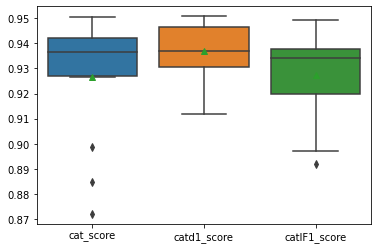

In [27]:
sns.boxplot(data=combo, showmeans=True);

In [28]:
combo.describe()

,cat_score,catd1_score,catIF1_score
count,15.000000,15.000000,15.000000
mean,0.926683,0.936878,0.927303
std,0.023191,0.011131,0.017662
min,0.872051,0.911824,0.892030
25%,0.926860,0.930445,0.919950
50%,0.936517,0.936986,0.934177
75%,0.942064,0.946589,0.937682
max,0.950638,0.950737,0.949209
